In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})

from src.util import read_json, sma
from config import config

In [2]:
cases = {}
cases['frozen_lake'] = [
    {
        "name":"Epsilon Greedy standard 1 - frozen lake",
        "color":"orange",
        "linestyle":"-",
        "marker":"o",
        "results directory":"./results/eps_fl_standard_1"
    },
    {
        "name":"Thompson standard 1 - frozen lake",
        "color":"#3498db",
        "linestyle":"-",
        "marker":"o",
        "results directory":"./results/thompson_fl_standard_1"
    },
    {
        "name":"Epsilon Greedy standard 10 - frozen lake",
        "color":"orange",
        "linestyle":"--",
        "marker":"o",
        "results directory":"./results/eps_fl_standard_10"
    },
    {
        "name":"Thompson standard 10 - frozen lake",
        "color":"#3498db",
        "linestyle":"--",
        "marker":"o",
        "results directory":"./results/thompson_fl_standard_10"
    },
    {
        "name":"Epsilon Greedy uniform 1 - frozen lake",
        "color":"orange",
        "linestyle":"-",
        "marker":"x",
        "results directory":"./results/eps_fl_uniform_1"
    },
    {
        "name":"Thompson uniform 1 - frozen lake",
        "color":"#3498db",
        "linestyle":"-",
        "marker":"x",
        "results directory":"./results/thompson_fl_uniform_1"
    },
    {
        "name":"Epsilon Greedy uniform 10 - frozen lake",
        "color":"orange",
        "linestyle":"--",
        "marker":"x",
        "results directory":"./results/eps_fl_uniform_10"
    },
    {
        "name":"Thompson uniform 10 - frozen lake",
        "color":"#3498db",
        "linestyle":"--",
        "marker":"x",
        "results directory":"./results/thompson_fl_uniform_10"
    }
]

In [3]:
cases['nchain'] = [
    {
        "name":"Epsilon Greedy standard 1 - frozen lake",
        "color":"orange",
        "linestyle":"-",
        "marker":"o",
        "results directory":"./results/eps_nchain_standard_1"
    },
    {
        "name":"Thompson standard 1 - frozen lake",
        "color":"#3498db",
        "linestyle":"-",
        "marker":"o",
        "results directory":"./results/thompson_nchain_standard_1"
    },
    {
        "name":"Epsilon Greedy standard 10 - frozen lake",
        "color":"orange",
        "linestyle":"--",
        "marker":"o",
        "results directory":"./results/eps_nchain_standard_10"
    },
    {
        "name":"Thompson standard 10 - frozen lake",
        "color":"#3498db",
        "linestyle":"--",
        "marker":"o",
        "results directory":"./results/thompson_nchain_standard_10"
    },
    {
        "name":"Epsilon Greedy uniform 1 - frozen lake",
        "color":"orange",
        "linestyle":"-",
        "marker":"x",
        "results directory":"./results/eps_nchain_uniform_1"
    },
    {
        "name":"Thompson uniform 1 - frozen lake",
        "color":"#3498db",
        "linestyle":"-",
        "marker":"x",
        "results directory":"./results/thompson_nchain_uniform_1"
    },
    {
        "name":"Epsilon Greedy uniform 10 - frozen lake",
        "color":"orange",
        "linestyle":"--",
        "marker":"x",
        "results directory":"./results/eps_nchain_uniform_10"
    },
    {
        "name":"Thompson uniform 10 - frozen lake",
        "color":"#3498db",
        "linestyle":"--",
        "marker":"x",
        "results directory":"./results/thompson_nchain_uniform_10"
    }
]

In [4]:
def get_case(results_dir):
    dirs = []
    agent_dirs = os.listdir(results_dir)
    
    for a in agent_dirs:
        o = results_dir+'/'+a
        dirs.append(o)
        
    return get_rewards(dirs)
        
def get_rewards(output_dirs):
    rewards = []
    for output_dir in output_dirs:
        print(output_dir)

        reward_arr = []
        episodes = sorted(os.listdir(output_dir),key=lambda x: int(x))
        print(len(episodes))
        for e in episodes:

            d = output_dir + '/' + e
            files = os.listdir(d)

            steps = []
            for f in files:
                fn = d+'/'+f
                j = read_json(fn)
                steps.append(j)

            R = np.sum([d['r'] for d in steps])
            reward_arr.append(R)

        rewards.append(np.array(reward_arr))

    rewards = np.mean(np.array(rewards), axis=0)
    return rewards

In [5]:
for k in cases:
    for c in cases[k]:
        c['rewards'] = get_case(c['results directory'])
        print(c['rewards'])

./results/eps_fl_standard_1/0
2000
[0. 0. 0. ... 1. 0. 0.]
./results/thompson_fl_standard_1/0
2000
[0. 0. 0. ... 0. 0. 0.]
./results/eps_fl_standard_10/0
2000
./results/eps_fl_standard_10/3
2000
./results/eps_fl_standard_10/9
2000
./results/eps_fl_standard_10/1
2000
./results/eps_fl_standard_10/2
2000
./results/eps_fl_standard_10/7
2000
./results/eps_fl_standard_10/5
2000
./results/eps_fl_standard_10/6
2000
./results/eps_fl_standard_10/8
2000
./results/eps_fl_standard_10/4
2000
[0.  0.  0.  ... 0.1 0.2 0.2]
./results/thompson_fl_standard_10/0
2000
./results/thompson_fl_standard_10/3
2000
./results/thompson_fl_standard_10/9
2000
./results/thompson_fl_standard_10/1
2000
./results/thompson_fl_standard_10/2
2000
./results/thompson_fl_standard_10/7
2000
./results/thompson_fl_standard_10/5
2000
./results/thompson_fl_standard_10/6
2000
./results/thompson_fl_standard_10/8
2000
./results/thompson_fl_standard_10/4
2000
[0.  0.  0.  ... 0.1 0.1 0.1]
./results/eps_fl_uniform_1/0
2000
[0. 0. 0. ...

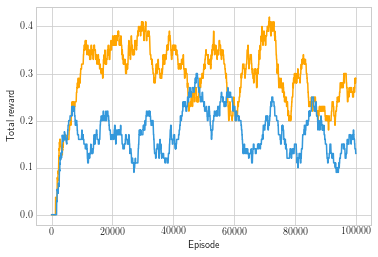

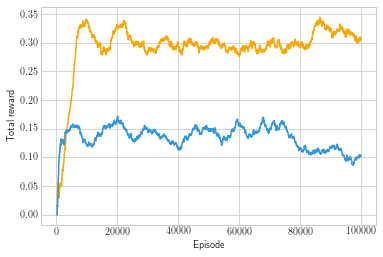

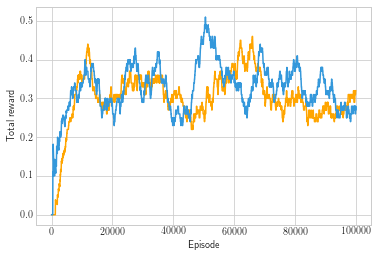

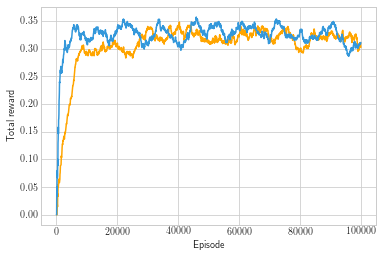

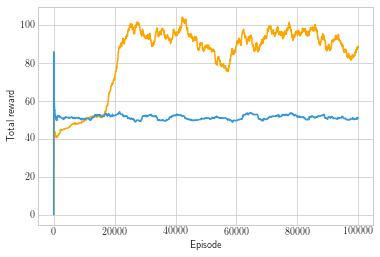

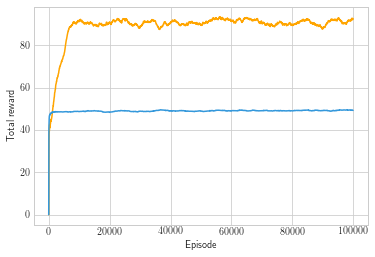

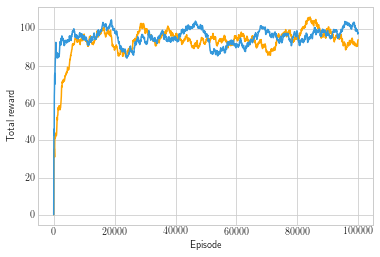

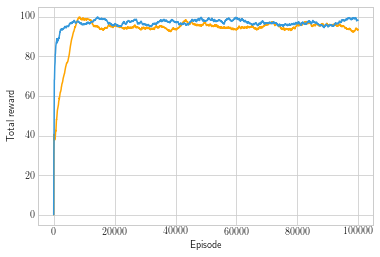

In [7]:
for k in cases:
    os.mkdir(k)
    for i in range(0,len(cases[k]),2):
        r1 = cases[k][i]['rewards']
        r2 = cases[k][i+1]['rewards']
                   
        r1 = sma(r1,100)
        r2 = sma(r2,100)
                 
        x = np.arange(0,len(r1))*config.WRITE_FREQUENCY

        plt.figure()
        plt.plot(x,r1, color=cases[k][i]['color'])
        plt.plot(x,r2, color=cases[k][i+1]['color'])

        plt.xlabel("Episode")
        plt.ylabel("Total reward")
        plt.savefig(k+"/{}.pdf".format(i), dpi=500)
        plt.show()
        plt.close()